# About
* Created on
* Objective
* References

# Overview
* KNN is one of the simplest classification algorithms and one of the most utilised ML algorithms
* In short, KNN is a <b> non-parametric, lazy learning algorithm </b>
    *  Its purpose is to use a database in which the data points are separated into several classes to predict the classification of a new sample point.
    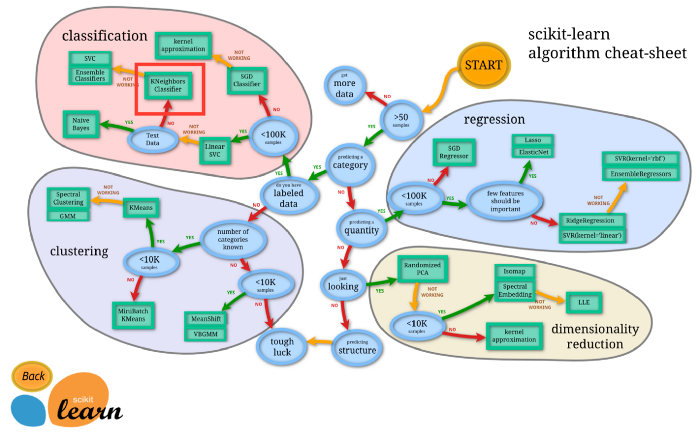

## Let's unpack that: non-parametric
* it means that it does not make any assumptions on the underlying data distribution (as is often the case with unsupervised learning)
* the model structure is mainly determined through the data
* considering how oftentimes, observational data may not wholly follow the theory, this is pretty useful!
* Plus, sometimes it can be a way to extract patterns or trends that we didn't know were there
* <i> kNN could and probably should be one of the first choices for a classification study when there is little or no prior knowledge about the distribution data </i>

## Let's unpack that: lazy
* What this means is that it does not use the training data points to do any generalization. 
* In other words, there is no explicit training phase or it is very minimal. 
* This also means that the training phase is pretty fast . Lack of generalization means that KNN keeps all the training data. To be more exact, all (or most) the training data is needed during the testing phase.
* KNN Algorithm is based on feature similarity: How closely out-of-sample features resemble our training set determines how we classify a given data point:
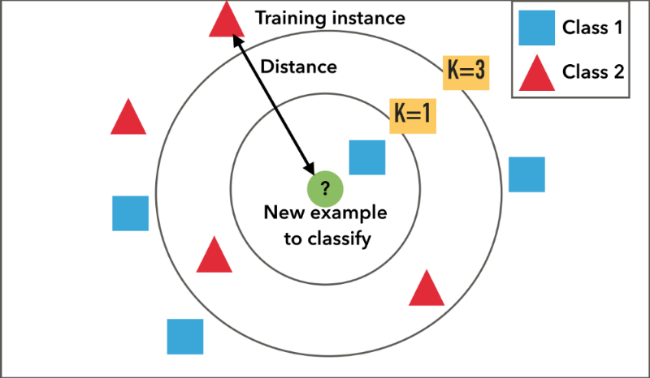


## k-nn for classification
* KNN can be used for classification — the output is a class membership (predicts a class — a discrete value).
* An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors. I
* t can also be used for regression — output is the value for the object (predicts continuous values). This value is the average (or median) of the values of its k nearest neighbors.

----
# Main idea behind k-nn

* It is directly derived from the fundamental question of classifying:
> Given a data point x, what is the probability of x belonging to some class c?
* Sound familiar? 
    * We're essentially looking for $p(c|x)$, the conditional probability 
* We're using the frequentist view of probability to compute this

## Naive view on probabilities
* Consider # 1
    *  You roll a six-sided, possibly rigged die and want to compute the probability of rolling a six, i.e. p(roll number 6).
    * How to do this? Well, you roll the die n times and write down how often it showed a six. If you have seen the number six k times, you say the probability of seeing a six is around $\frac{k}{n}$. 
* What if we want to compute, $p(roll number 6 | roll an even number)$
    * we don't even need bayes theorem for this, just roll the die again and ignore all the rolls with an odd number
    * we're just filtering out results to our area of interest(basically what conditioning is)
    * If you rolled the die n times, have seen m even numbers and k of them were a six, the probability above is around $\frac{k}{m}$ instead of $\frac{k}{n}$. 

## Tying into k-nn
* We want to compute p(c|x) where x is a vector containing the features and c is some class. As in the die example, we
    * need a lot of data points,
    * filter out the ones with features x and
    * check how often these data points belong to class c.
* the relative frequency is our guess for the probability p(c|x).
* but herein lies the <b> problem </b>
    * Usually, we don’t have many data points with the same features.
        * narrowing down to our subset of interest becomes tricky
    * What happens if we want to predict the gender for a data point with features we have never seen before? (classic prediction problem)

* That’s why this naive approach does not work. 
* What the k-nearest neighbor algorithm does instead is the following:
> k-nearest neighbours tries to approximate the probability p(c|x) not with data points that have exactly the features x, but with data points with features close to x.
* it is an approximation as with all predictions
* k-nearest neighbors allows considering people close to having characteristics of interest. The k in the algorithm is the number of people we consider, it is a hyperparameter.
> These are parameters that we or a hyperparameter optimization algorithm such as grid search have to choose. They are not directly optimized by the learning algorithm.

----
# Summary of the algorithm

## broadly

### Training:
1. Organize the training data in some way. During prediction time, this order should make it possible to give us the k closest points for any given data point x.
2. That’s it !
### Prediction:
1. For a new data point x, find the k closest neighbors in the organized training data.
2. Aggregate the labels of these k neighbors.
3. Output the label/probabilities.

Specifics
   * There are a lot of specifics we need to get into
   * what type of organizing?
   * how to measure proximity?
       * e.g. Euclidean distance
   * how to aggregate?
       * averaging
Choosing

## A more theoretical summary

1. A positive integer k is specified, along with a new sample
2. We select the k entries in our database which are closest to the new sample
3. We find the most common classification of these entries
4. This is the classification we give to the new sample

A few other features of KNN:
* KNN stores the entire training dataset which it uses as its representation.
* KNN does not learn any model.
* KNN makes predictions just-in-time by calculating the similarity between an input sample and each training instance.

----
# Implementation

## Start with a quick primer!

In [1]:
import numpy as np
features = np.array([[1, 2], [3, 4], [1, 3], [0, 2]])
labels = np.array([0, 0, 1, 1])
new_point = np.array([1, 4])

* use distance as the square of the euclidean distance between newpoints and original points
* we can see the 3rd point has the smallest distance

In [3]:
distances = ((features - new_point)**2).sum(axis=1)
distances

array([4, 4, 1, 5])

In [4]:
# extract the closest points
distances.argsort()[:3]

array([2, 0, 1])

* The result is `[2, 0, 1, 3]` which tells us that the data point with index 2 is the smallest (out point number three), then the point with index 0, then with index 1, and finally the point with index 3 is the largest.

If we want the three closest neighbors, for example, we could get them via

In [5]:
distances.argsort()[:3]

array([2, 0, 1])

And the labels correspond to these closest points via

In [6]:
labels[distances.argsort()[:3]]

array([1, 0, 0])

## Let's get down to business

In [8]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
class KNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.X_ = np.copy(X)
        self.y_ = np.copy(y)
        self.n_classes_ = self.y_.max() + 1
        
        return self
    
    def predict_proba(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = []
        for x in X:
            distances = ((self.X_ - x)**2).sum(axis=1)
            smallest_distances = distances.argsort()[:self.k]
            closest_labels = self.y_[smallest_distances]
            count_labels = np.bincount(
                closest_labels,
                minlength=self.n_classes_
            )
            
            res.append(count_labels / count_labels.sum())
        
        return np.array(res)
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        res = self.predict_proba(X)
        
        return res.argmax(axis=1)

## testing it out

In [9]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=20, centers=[(0,0), (5,5), (-5, 5)], random_state=0)
X = np.vstack([X, np.array([[2, 4], [-1, 4], [1, 6]])])
y = np.append(y, [2, 1, 0])

In [10]:
my_knn = KNNClassifier(k=3)
my_knn.fit(X, y)
my_knn.predict_proba([[0, 1], [0, 5], [3, 4]])

array([[1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.66666667, 0.33333333]])

In [16]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions

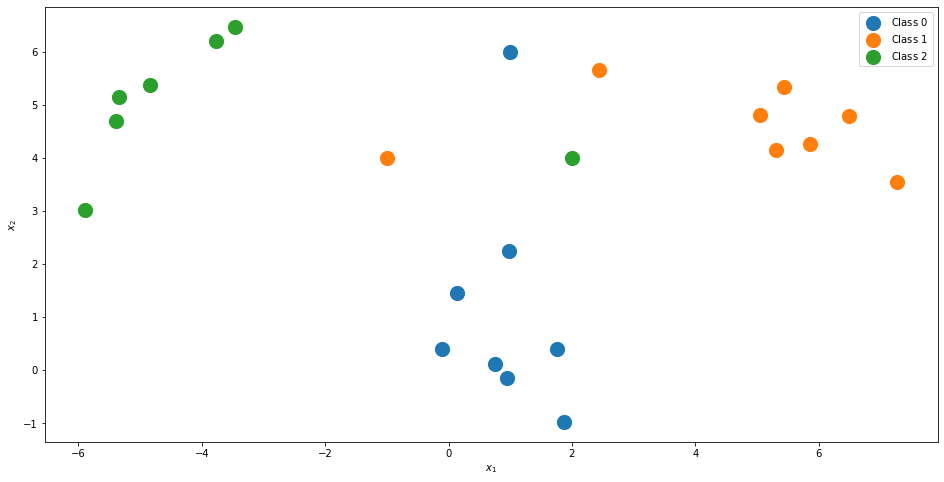

In [17]:
plt.figure(figsize=(16, 8))
for i in range(3):
    plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200, label=f'Class ${i}$')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

### Interpretation
The first point is 100% belonging to class 1 the second point lies in each class equally with 33%, and the third point is about 67% class 2 and 33% class 3.

In [11]:
# For concrete labels:
my_knn.predict([[0, 1], [0, 5], [3, 4]])

array([0, 0, 1])

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
my_knn.predict_proba([[0, 1], [0, 5], [3, 4]])

array([[1.        , 0.        , 0.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.66666667, 0.33333333]])

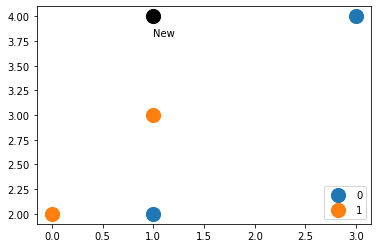

In [18]:
features = np.array([[1, 2], [3, 4], [1, 3], [0, 2]])
labels = np.array([0, 0, 1, 1])
new_point = np.array([1, 4])

plt.scatter(features[np.where(labels==0), 0], features[np.where(labels==0), 1], s=200, label='0')
plt.scatter(features[np.where(labels==1), 0], features[np.where(labels==1), 1], s=200, label='1')
plt.scatter(new_point[0], new_point[1], s=200, c='k')
plt.annotate('New', (new_point[0], new_point[1]-0.2))
plt.legend(loc='lower right')

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

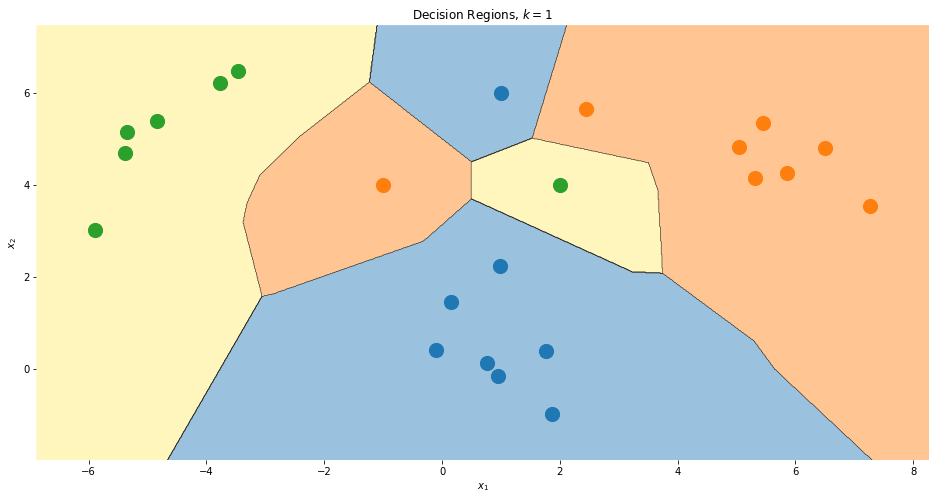

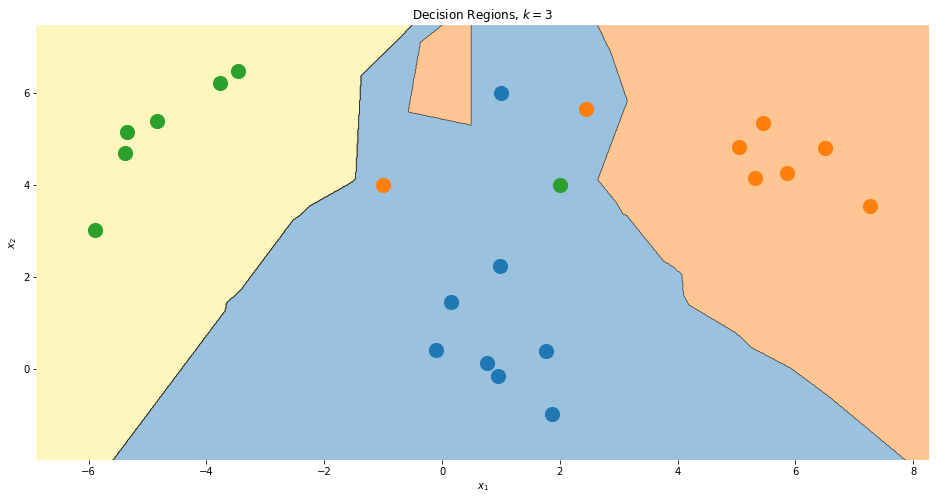

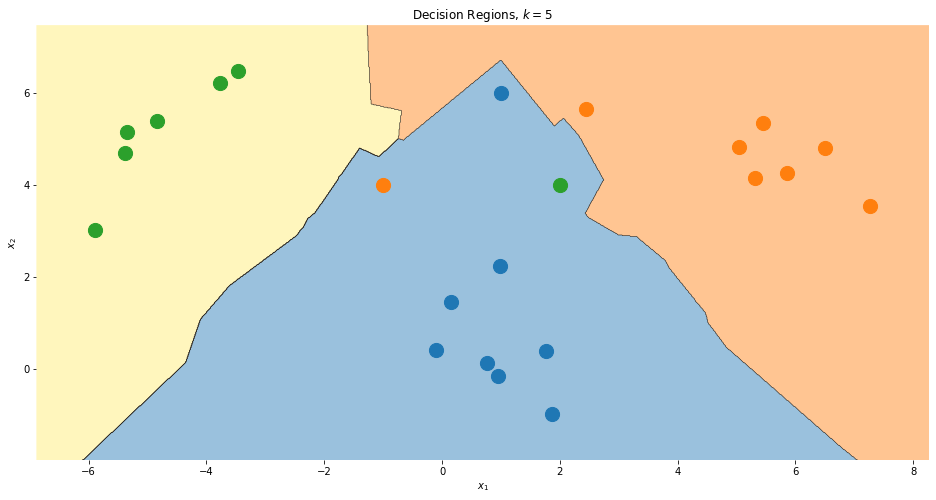

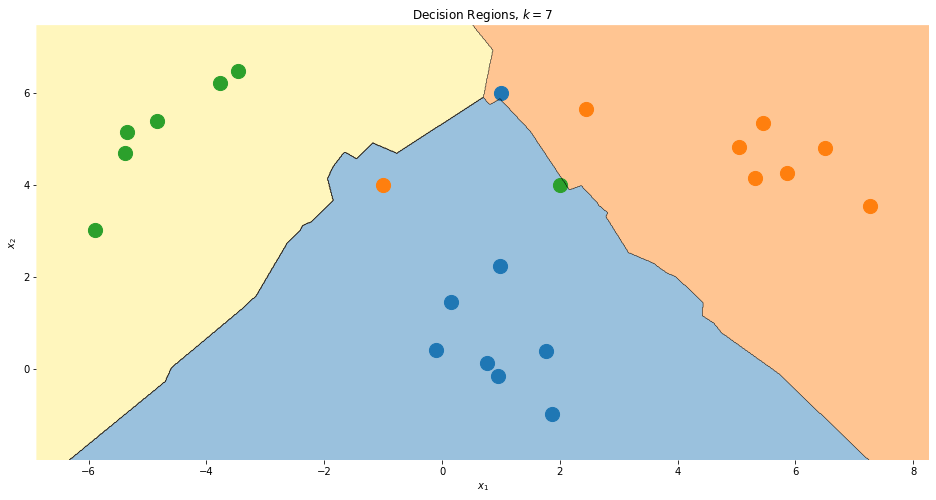

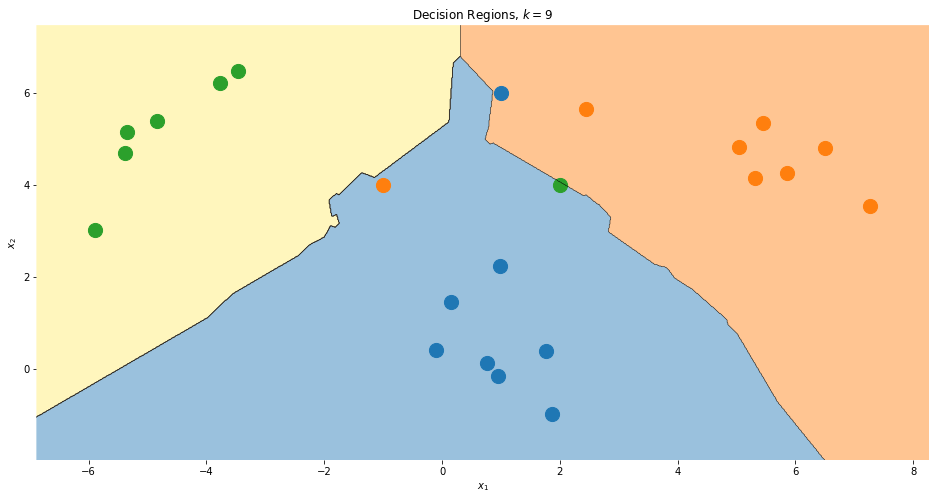

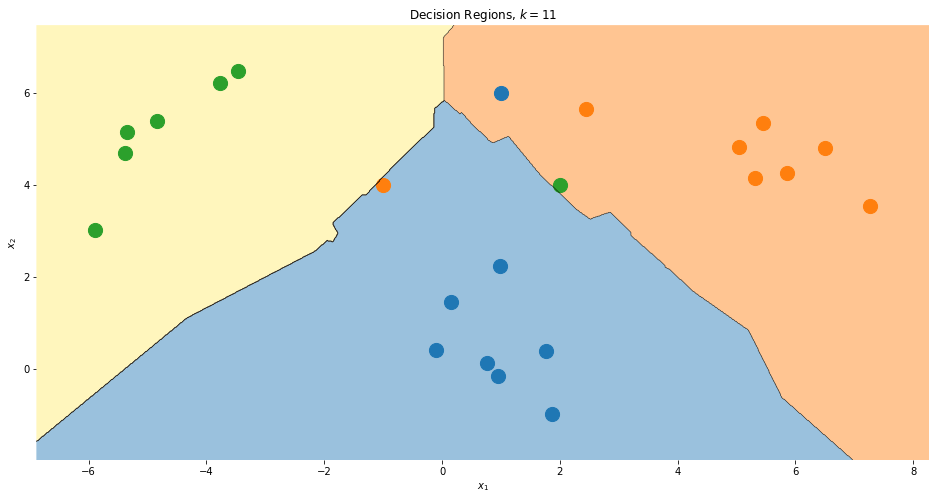

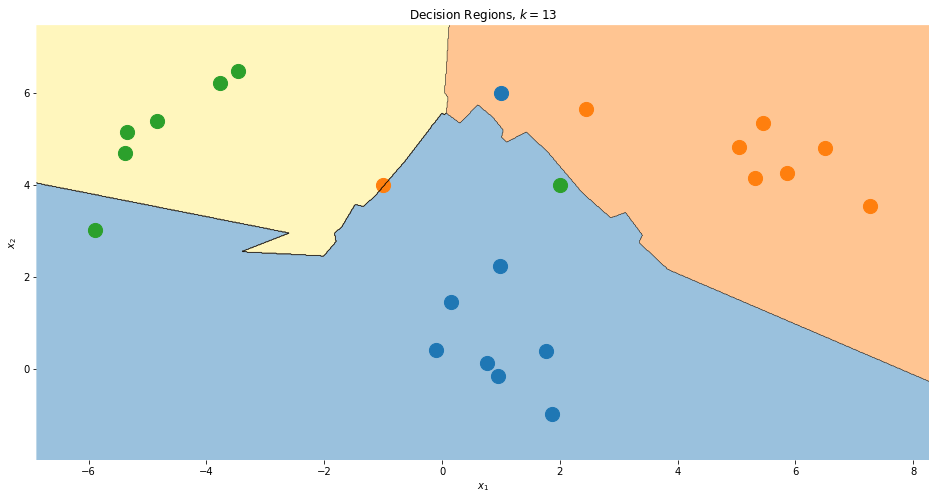

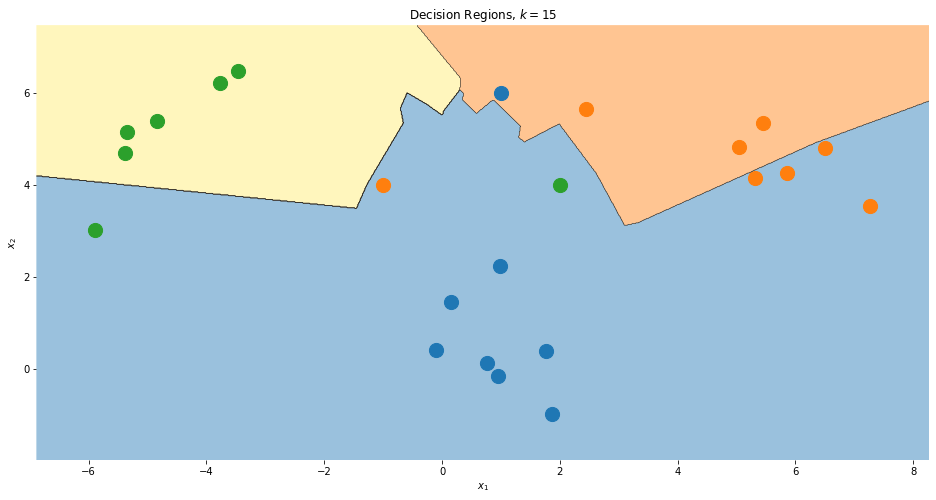

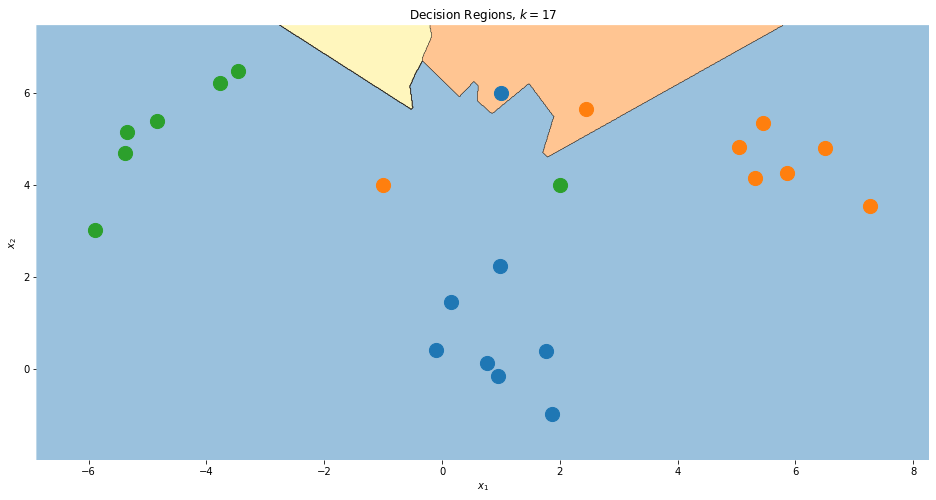

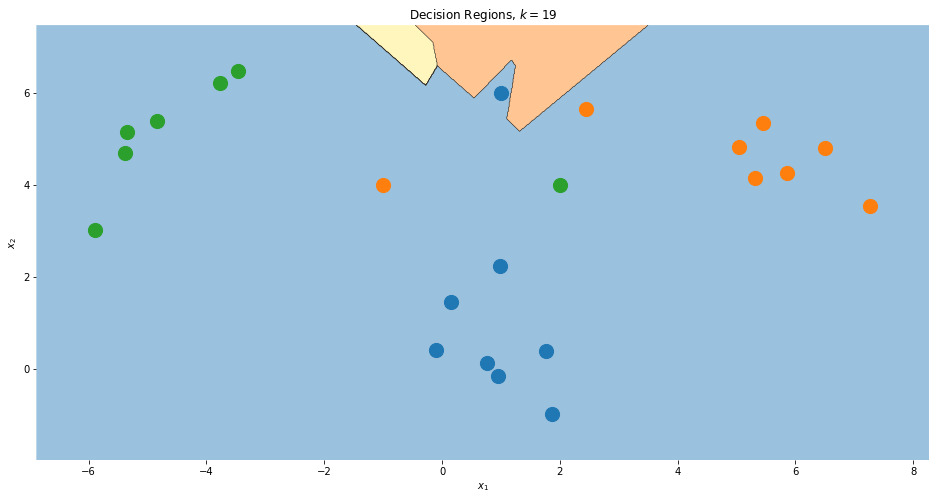

In [20]:
for k in [2*i+1 for i in range(10)]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    plt.figure(figsize=(16, 8))
    plot_decision_regions(X, y, clf=knn, legend=0, colors='#1f77b4,#ff7f0e,#ffec6e')

    for i in range(3):
        plt.scatter(X[np.where(y==i), 0], X[np.where(y==i), 1], s=200)
    #plt.scatter([0, 0, 3], [1, 5, 4], c='k', s=200)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title(f'Decision Regions, $k={k}$')

### comments
* The blue region gets bigger in the end, because of this preferential treatment of this class. 
* For k=1 the boundaries are a mess: the model is overfitting. 
* On the other side of the extreme, k is as large as the size of the dataset, and all points are used for the aggregation step. Thus, each data point gets the same prediction: the majority class. The model is underfitting in this case. 
* The sweet spot is somewhere in between and can be found using hyperparameter optimization techniques.